# Assignment: Ionosphere Data Problem

### Dataset Description: 

This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.

Received signals were processed using an autocorrelation function whose arguments are the time of a pulse and the pulse number. There were 17 pulse numbers for the Goose Bay system. Instances in this databse are described by 2 attributes per pulse number, corresponding to the complex values returned by the function resulting from the complex electromagnetic signal.

### Attribute Information:

- All 34 are continuous
- The 35th attribute is either "good" or "bad" according to the definition summarized above. This is a binary classification task.

 <br><br>

<table border="1"  cellpadding="6">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">351</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Integer,Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">34</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">N/A</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Classification</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">N/A</p></td>
	</tr>
    </tbody>
    </table>

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature ) or any usless column.
- Shuffle the data if needed.
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 60 and 40 ratio.
- Encode labels.
- Model : 1 hidden layers including 16 unit.
- Compilation Step (Note : Its a Binary problem , select loss , metrics according to it)
- Train the Model with Epochs (100).
- If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
- Prediction should be > **92%**
- Evaluation Step
- Prediction


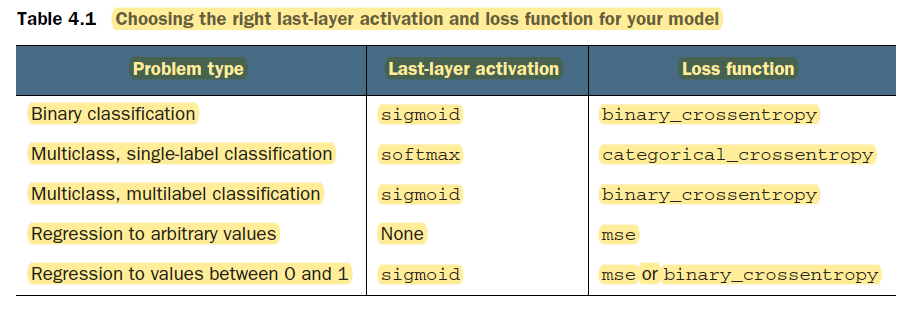

# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/ionosphere_data.csv)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from keras import layers
from keras import optimizers

In [2]:
ion_df = pd.read_csv('ionosphere_data.csv')

In [3]:
ion_df['label'].unique()

array(['g', 'b'], dtype=object)

In [4]:
ion_df['label'] = ion_df['label'].map({'g':1,'b':0})

In [5]:
ion_df['label'].unique()

array([1, 0], dtype=int64)

In [6]:
ion_df.isnull().sum()

feature1     0
feature2     0
feature3     0
feature4     0
feature5     0
feature6     0
feature7     0
feature8     0
feature9     0
feature10    0
feature11    0
feature12    0
feature13    0
feature14    0
feature15    0
feature16    0
feature17    0
feature18    0
feature19    0
feature20    0
feature21    0
feature22    0
feature23    0
feature24    0
feature25    0
feature26    0
feature27    0
feature28    0
feature29    0
feature30    0
feature31    0
feature32    0
feature33    0
feature34    0
label        0
dtype: int64

In [7]:
ion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature1   351 non-null    int64  
 1   feature2   351 non-null    int64  
 2   feature3   351 non-null    float64
 3   feature4   351 non-null    float64
 4   feature5   351 non-null    float64
 5   feature6   351 non-null    float64
 6   feature7   351 non-null    float64
 7   feature8   351 non-null    float64
 8   feature9   351 non-null    float64
 9   feature10  351 non-null    float64
 10  feature11  351 non-null    float64
 11  feature12  351 non-null    float64
 12  feature13  351 non-null    float64
 13  feature14  351 non-null    float64
 14  feature15  351 non-null    float64
 15  feature16  351 non-null    float64
 16  feature17  351 non-null    float64
 17  feature18  351 non-null    float64
 18  feature19  351 non-null    float64
 19  feature20  351 non-null    float64
 20  feature21 

<AxesSubplot:>

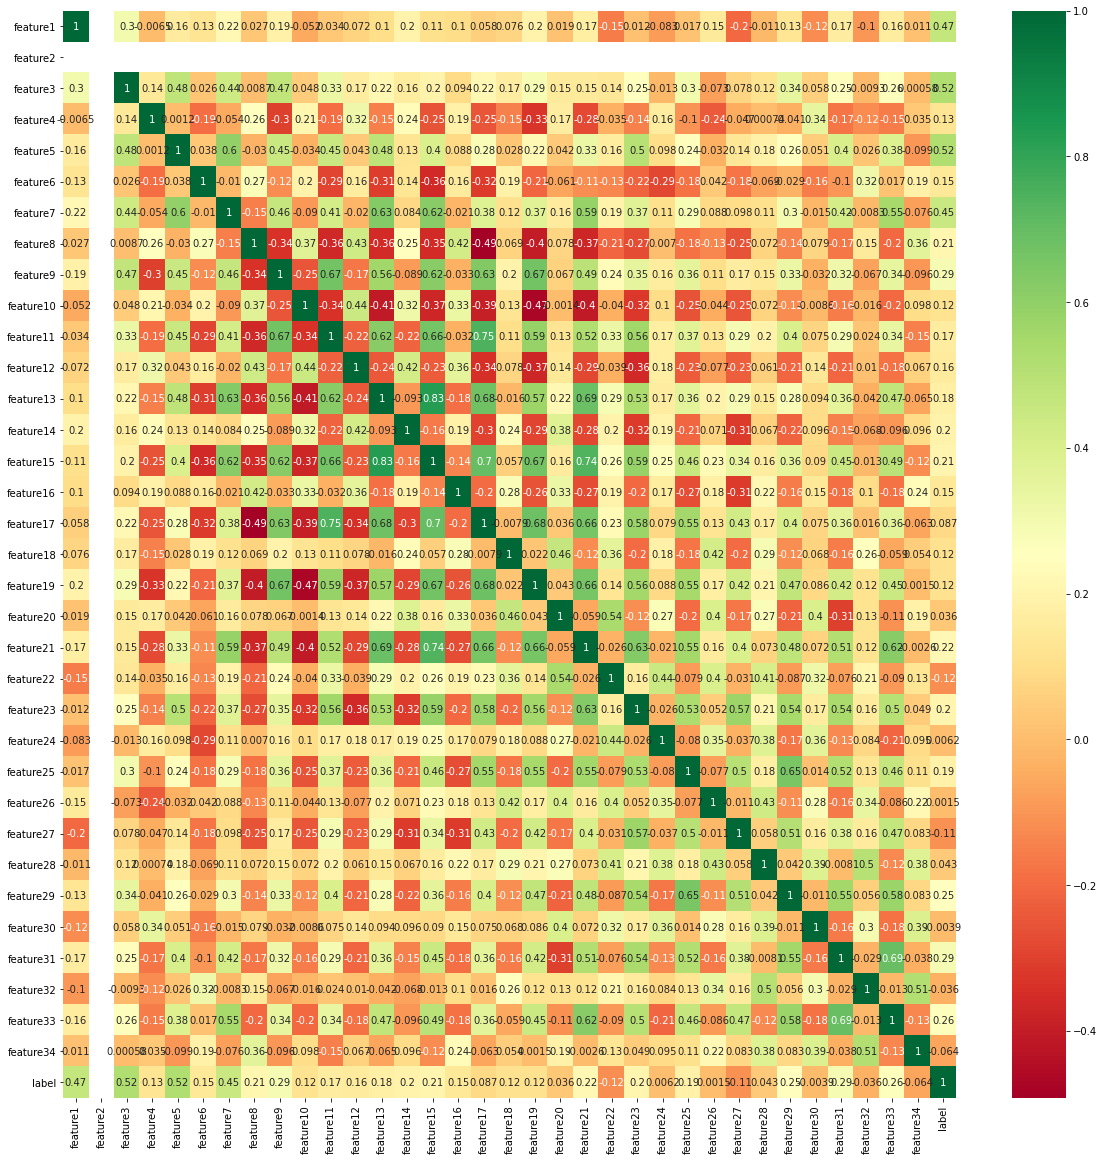

In [67]:
plt.figure(figsize=(20,20))
sns.heatmap(ion_df.corr(),annot=True,cmap="RdYlGn")

In [8]:
ion_df.corr()['label'].sort_values(ascending=False)

label        1.000000
feature3     0.519145
feature5     0.516477
feature1     0.465614
feature7     0.450429
feature9     0.294852
feature31    0.294417
feature33    0.261157
feature29    0.250036
feature21    0.219583
feature8     0.207544
feature15    0.207201
feature23    0.204361
feature14    0.197041
feature25    0.188185
feature13    0.181682
feature11    0.167908
feature12    0.159940
feature6     0.149099
feature16    0.148775
feature4     0.125884
feature10    0.120634
feature18    0.119346
feature19    0.117435
feature17    0.087060
feature28    0.042756
feature20    0.035620
feature24    0.006193
feature26    0.001541
feature30   -0.003942
feature32   -0.036004
feature34   -0.064168
feature27   -0.111107
feature22   -0.116385
feature2          NaN
Name: label, dtype: float64

# Select Features with high Correlation

In [9]:
ion = ion_df[['feature3','feature5','feature1','feature7','feature9',
              'feature31','feature33','feature29','feature21','feature27','feature22','label']]

In [10]:
ion.head()

,feature3,feature5,feature1,feature7,feature9,feature31,feature33,feature29,feature21,feature27,feature22,label
0,0.99539,0.85243,1,0.83398,1.00000,0.42267,0.18641,0.21266,0.56971,0.41078,-0.29674,1
1,1.00000,0.93035,1,-0.10868,1.00000,-0.16626,-0.13738,-0.19040,-0.13151,-0.20468,-0.45300,0
2,1.00000,1.00000,1,1.00000,0.88965,0.60436,0.56045,0.43100,0.70887,0.58984,-0.27502,1
3,1.00000,1.00000,1,0.71216,0.00000,0.25682,-0.32382,1.00000,-0.69975,0.51613,1.00000,0
4,1.00000,0.94140,1,0.92106,0.77152,-0.05707,-0.04608,0.02431,0.05982,0.13290,-0.35575,1


array([[<AxesSubplot:title={'center':'feature3'}>,
        <AxesSubplot:title={'center':'feature5'}>,
        <AxesSubplot:title={'center':'feature1'}>],
       [<AxesSubplot:title={'center':'feature7'}>,
        <AxesSubplot:title={'center':'feature9'}>,
        <AxesSubplot:title={'center':'feature31'}>],
       [<AxesSubplot:title={'center':'feature33'}>,
        <AxesSubplot:title={'center':'feature29'}>,
        <AxesSubplot:title={'center':'feature21'}>],
       [<AxesSubplot:title={'center':'feature27'}>,
        <AxesSubplot:title={'center':'feature22'}>,
        <AxesSubplot:title={'center':'label'}>]], dtype=object)

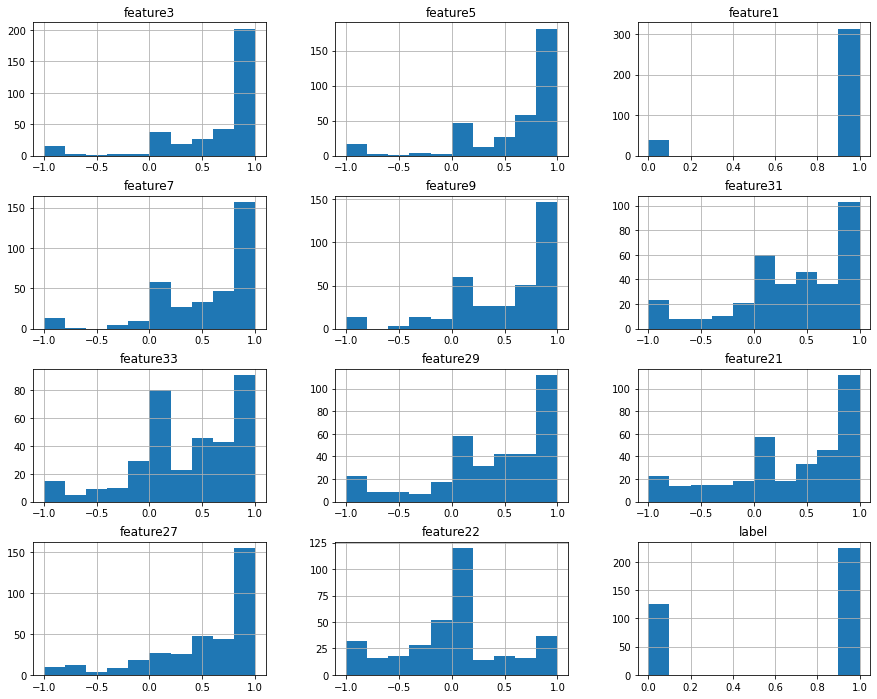

In [11]:
ion.hist(figsize=(15,12))

# Split Data

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x = (ion.loc[:, ion.columns != 'label'])
y = (ion.loc[:, ion.columns == 'label'])

In [14]:
# Split to 70% Train and 30% Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42,
                                                   stratify=x['feature1'])

# Split to 15% Test and 15% Validation
x_test, x_val, y_test, y_val = train_test_split(x, y, test_size=0.50, random_state=42,
                                                   stratify=x['feature1'])

In [15]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(245, 11)
(175, 11)
(176, 11)
(245, 1)
(175, 1)
(176, 1)


# Scale Data

In [16]:
from sklearn.preprocessing import MinMaxScaler
# Use MinMax Scaller to scale all features
min_max_scaler = MinMaxScaler()

In [17]:
x_train_s = min_max_scaler.fit_transform(x_train)
x_test_s = min_max_scaler.transform(x_test)
x_val_s = min_max_scaler.transform(x_val)

In [18]:
print(x_train_s.shape)
print(x_test_s.shape)
print(x_val_s.shape)

(245, 11)
(175, 11)
(176, 11)


# Build Model

In [19]:
# Build Model and Architecture of Deep Neural Network

# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model = Sequential()
model.add(Dense(units = 16, activation='relu', input_dim=11))
model.add(Dense(units = 8, activation='relu'))
model.add(Dense(units = 6, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [81]:
hist = model.fit(
    x_train_s, y_train, epochs = 500,
    validation_data = (x_val_s, y_val)
)

Epoch 1/500
8/8 [==============================] - 1s 74ms/step - loss: 0.7009 - accuracy: 0.3272 - val_loss: 0.6987 - val_accuracy: 0.2955
Epoch 2/500
8/8 [==============================] - 0s 29ms/step - loss: 0.6980 - accuracy: 0.2795 - val_loss: 0.6955 - val_accuracy: 0.3466
Epoch 3/500
8/8 [==============================] - 0s 30ms/step - loss: 0.6950 - accuracy: 0.4477 - val_loss: 0.6925 - val_accuracy: 0.6761
Epoch 4/500
8/8 [==============================] - 0s 30ms/step - loss: 0.6923 - accuracy: 0.6680 - val_loss: 0.6899 - val_accuracy: 0.6591
Epoch 5/500
8/8 [==============================] - 0s 25ms/step - loss: 0.6890 - accuracy: 0.6520 - val_loss: 0.6874 - val_accuracy: 0.6591
Epoch 6/500
8/8 [==============================] - 0s 29ms/step - loss: 0.6870 - accuracy: 0.6686 - val_loss: 0.6850 - val_accuracy: 0.6591
Epoch 7/500
8/8 [==============================] - 0s 29ms/step - loss: 0.6859 - accuracy: 0.6328 - val_loss: 0.6828 - val_accuracy: 0.6591
Epoch 8/500
8/8 [===

8/8 [==============================] - 0s 40ms/step - loss: 0.6059 - accuracy: 0.6283 - val_loss: 0.5860 - val_accuracy: 0.6591
Epoch 118/500
8/8 [==============================] - 0s 26ms/step - loss: 0.6314 - accuracy: 0.6001 - val_loss: 0.5852 - val_accuracy: 0.6591
Epoch 119/500
8/8 [==============================] - 0s 29ms/step - loss: 0.6015 - accuracy: 0.6384 - val_loss: 0.5844 - val_accuracy: 0.6591
Epoch 120/500
8/8 [==============================] - 0s 29ms/step - loss: 0.5813 - accuracy: 0.6610 - val_loss: 0.5836 - val_accuracy: 0.6591
Epoch 121/500
8/8 [==============================] - 0s 29ms/step - loss: 0.6057 - accuracy: 0.6326 - val_loss: 0.5827 - val_accuracy: 0.6591
Epoch 122/500
8/8 [==============================] - 0s 29ms/step - loss: 0.5993 - accuracy: 0.6375 - val_loss: 0.5818 - val_accuracy: 0.6591
Epoch 123/500
8/8 [==============================] - 0s 31ms/step - loss: 0.6188 - accuracy: 0.6006 - val_loss: 0.5809 - val_accuracy: 0.6591
Epoch 124/500
8/8 [=

Epoch 175/500
8/8 [==============================] - 0s 23ms/step - loss: 0.5174 - accuracy: 0.7218 - val_loss: 0.5170 - val_accuracy: 0.7386
Epoch 176/500
8/8 [==============================] - 0s 24ms/step - loss: 0.5443 - accuracy: 0.7076 - val_loss: 0.5155 - val_accuracy: 0.7386
Epoch 177/500
8/8 [==============================] - 0s 32ms/step - loss: 0.5147 - accuracy: 0.7307 - val_loss: 0.5142 - val_accuracy: 0.7386
Epoch 178/500
8/8 [==============================] - 0s 33ms/step - loss: 0.5199 - accuracy: 0.7408 - val_loss: 0.5131 - val_accuracy: 0.7386
Epoch 179/500
8/8 [==============================] - 0s 39ms/step - loss: 0.5523 - accuracy: 0.6949 - val_loss: 0.5115 - val_accuracy: 0.7386
Epoch 180/500
8/8 [==============================] - 0s 29ms/step - loss: 0.5070 - accuracy: 0.7476 - val_loss: 0.5100 - val_accuracy: 0.7386
Epoch 181/500
8/8 [==============================] - 0s 29ms/step - loss: 0.5055 - accuracy: 0.7453 - val_loss: 0.5087 - val_accuracy: 0.7443
Epoch 

Epoch 233/500
8/8 [==============================] - 0s 29ms/step - loss: 0.4609 - accuracy: 0.8180 - val_loss: 0.4262 - val_accuracy: 0.8352
Epoch 234/500
8/8 [==============================] - 0s 31ms/step - loss: 0.4652 - accuracy: 0.8039 - val_loss: 0.4247 - val_accuracy: 0.8352
Epoch 235/500
8/8 [==============================] - 0s 31ms/step - loss: 0.4489 - accuracy: 0.8244 - val_loss: 0.4235 - val_accuracy: 0.8352
Epoch 236/500
8/8 [==============================] - 0s 28ms/step - loss: 0.4124 - accuracy: 0.8608 - val_loss: 0.4227 - val_accuracy: 0.8409
Epoch 237/500
8/8 [==============================] - 0s 65ms/step - loss: 0.4235 - accuracy: 0.8491 - val_loss: 0.4207 - val_accuracy: 0.8352
Epoch 238/500
8/8 [==============================] - 0s 27ms/step - loss: 0.4330 - accuracy: 0.8470 - val_loss: 0.4195 - val_accuracy: 0.8466
Epoch 239/500
8/8 [==============================] - 0s 30ms/step - loss: 0.4216 - accuracy: 0.8468 - val_loss: 0.4181 - val_accuracy: 0.8466
Epoch 

Epoch 291/500
8/8 [==============================] - 0s 30ms/step - loss: 0.3618 - accuracy: 0.8752 - val_loss: 0.3579 - val_accuracy: 0.9034
Epoch 292/500
8/8 [==============================] - 0s 30ms/step - loss: 0.4055 - accuracy: 0.8671 - val_loss: 0.3556 - val_accuracy: 0.8977
Epoch 293/500
8/8 [==============================] - 0s 28ms/step - loss: 0.3378 - accuracy: 0.8965 - val_loss: 0.3561 - val_accuracy: 0.9034
Epoch 294/500
8/8 [==============================] - 0s 29ms/step - loss: 0.3694 - accuracy: 0.8883 - val_loss: 0.3531 - val_accuracy: 0.8977
Epoch 295/500
8/8 [==============================] - 0s 28ms/step - loss: 0.3932 - accuracy: 0.8715 - val_loss: 0.3518 - val_accuracy: 0.8977
Epoch 296/500
8/8 [==============================] - 0s 33ms/step - loss: 0.3679 - accuracy: 0.8807 - val_loss: 0.3511 - val_accuracy: 0.8977
Epoch 297/500
8/8 [==============================] - 0s 29ms/step - loss: 0.3762 - accuracy: 0.8798 - val_loss: 0.3494 - val_accuracy: 0.8920
Epoch 

Epoch 349/500
8/8 [==============================] - 0s 28ms/step - loss: 0.3514 - accuracy: 0.8876 - val_loss: 0.3049 - val_accuracy: 0.9148
Epoch 350/500
8/8 [==============================] - 0s 30ms/step - loss: 0.3102 - accuracy: 0.9003 - val_loss: 0.3053 - val_accuracy: 0.9148
Epoch 351/500
8/8 [==============================] - 0s 29ms/step - loss: 0.3661 - accuracy: 0.8572 - val_loss: 0.3036 - val_accuracy: 0.9148
Epoch 352/500
8/8 [==============================] - 0s 28ms/step - loss: 0.3151 - accuracy: 0.9019 - val_loss: 0.3030 - val_accuracy: 0.9148
Epoch 353/500
8/8 [==============================] - 0s 30ms/step - loss: 0.3051 - accuracy: 0.8921 - val_loss: 0.3034 - val_accuracy: 0.9148
Epoch 354/500
8/8 [==============================] - 0s 28ms/step - loss: 0.3303 - accuracy: 0.9187 - val_loss: 0.3016 - val_accuracy: 0.9148
Epoch 355/500
8/8 [==============================] - 0s 28ms/step - loss: 0.3687 - accuracy: 0.8789 - val_loss: 0.3010 - val_accuracy: 0.9148
Epoch 

Epoch 407/500
8/8 [==============================] - 0s 23ms/step - loss: 0.2973 - accuracy: 0.8997 - val_loss: 0.2708 - val_accuracy: 0.9318
Epoch 408/500
8/8 [==============================] - 0s 20ms/step - loss: 0.2852 - accuracy: 0.9064 - val_loss: 0.2707 - val_accuracy: 0.9261
Epoch 409/500
8/8 [==============================] - 0s 24ms/step - loss: 0.2811 - accuracy: 0.9097 - val_loss: 0.2712 - val_accuracy: 0.9261
Epoch 410/500
8/8 [==============================] - 0s 30ms/step - loss: 0.2758 - accuracy: 0.9101 - val_loss: 0.2713 - val_accuracy: 0.9261
Epoch 411/500
8/8 [==============================] - 0s 28ms/step - loss: 0.2972 - accuracy: 0.9152 - val_loss: 0.2737 - val_accuracy: 0.9205
Epoch 412/500
8/8 [==============================] - 0s 28ms/step - loss: 0.2666 - accuracy: 0.9193 - val_loss: 0.2715 - val_accuracy: 0.9205
Epoch 413/500
8/8 [==============================] - 0s 29ms/step - loss: 0.3095 - accuracy: 0.8878 - val_loss: 0.2685 - val_accuracy: 0.9318
Epoch 

# Check Model's Loss and Accuracy against Validation Data

In [82]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

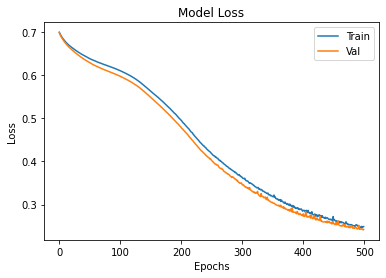

In [83]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

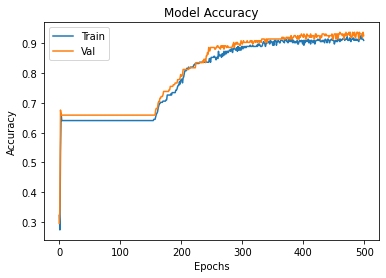

In [84]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (1) Retune Model (increase number of neurons)

In [85]:
# Build Model and Architecture of Deep Neural Network

# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model = Sequential()
model.add(Dense(units = 20, activation='relu', input_dim=11))
model.add(Dense(units = 14, activation='relu'))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [86]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [87]:
hist = model.fit(
    x_train_s, y_train, epochs = 500,
    validation_data = (x_val_s, y_val)
)

Epoch 1/500
8/8 [==============================] - 1s 77ms/step - loss: 0.7490 - accuracy: 0.3396 - val_loss: 0.7158 - val_accuracy: 0.3807
Epoch 2/500
8/8 [==============================] - 0s 26ms/step - loss: 0.7136 - accuracy: 0.3379 - val_loss: 0.6885 - val_accuracy: 0.4659
Epoch 3/500
8/8 [==============================] - 0s 26ms/step - loss: 0.6865 - accuracy: 0.6200 - val_loss: 0.6682 - val_accuracy: 0.6875
Epoch 4/500
8/8 [==============================] - 0s 27ms/step - loss: 0.6684 - accuracy: 0.6420 - val_loss: 0.6539 - val_accuracy: 0.6705
Epoch 5/500
8/8 [==============================] - 0s 30ms/step - loss: 0.6508 - accuracy: 0.6592 - val_loss: 0.6433 - val_accuracy: 0.6591
Epoch 6/500
8/8 [==============================] - 0s 30ms/step - loss: 0.6431 - accuracy: 0.6419 - val_loss: 0.6355 - val_accuracy: 0.6591
Epoch 7/500
8/8 [==============================] - 0s 29ms/step - loss: 0.6507 - accuracy: 0.6128 - val_loss: 0.6289 - val_accuracy: 0.6591
Epoch 8/500
8/8 [===

8/8 [==============================] - 0s 31ms/step - loss: 0.4693 - accuracy: 0.8011 - val_loss: 0.4734 - val_accuracy: 0.8239
Epoch 118/500
8/8 [==============================] - 0s 31ms/step - loss: 0.4692 - accuracy: 0.8070 - val_loss: 0.4708 - val_accuracy: 0.8182
Epoch 119/500
8/8 [==============================] - 0s 30ms/step - loss: 0.4381 - accuracy: 0.8361 - val_loss: 0.4689 - val_accuracy: 0.8239
Epoch 120/500
8/8 [==============================] - 0s 38ms/step - loss: 0.4773 - accuracy: 0.7930 - val_loss: 0.4668 - val_accuracy: 0.8239
Epoch 121/500
8/8 [==============================] - 0s 33ms/step - loss: 0.4600 - accuracy: 0.8092 - val_loss: 0.4642 - val_accuracy: 0.8239
Epoch 122/500
8/8 [==============================] - 0s 31ms/step - loss: 0.4458 - accuracy: 0.8177 - val_loss: 0.4623 - val_accuracy: 0.8239
Epoch 123/500
8/8 [==============================] - 0s 31ms/step - loss: 0.4659 - accuracy: 0.8075 - val_loss: 0.4599 - val_accuracy: 0.8239
Epoch 124/500
8/8 [=

Epoch 175/500
8/8 [==============================] - 0s 27ms/step - loss: 0.3360 - accuracy: 0.8879 - val_loss: 0.3554 - val_accuracy: 0.8920
Epoch 176/500
8/8 [==============================] - 0s 27ms/step - loss: 0.3522 - accuracy: 0.8716 - val_loss: 0.3538 - val_accuracy: 0.8864
Epoch 177/500
8/8 [==============================] - 0s 25ms/step - loss: 0.3399 - accuracy: 0.8926 - val_loss: 0.3540 - val_accuracy: 0.8977
Epoch 178/500
8/8 [==============================] - 0s 21ms/step - loss: 0.3345 - accuracy: 0.8949 - val_loss: 0.3510 - val_accuracy: 0.8977
Epoch 179/500
8/8 [==============================] - 0s 26ms/step - loss: 0.3468 - accuracy: 0.8868 - val_loss: 0.3493 - val_accuracy: 0.8977
Epoch 180/500
8/8 [==============================] - 0s 27ms/step - loss: 0.3192 - accuracy: 0.9018 - val_loss: 0.3483 - val_accuracy: 0.8977
Epoch 181/500
8/8 [==============================] - 0s 24ms/step - loss: 0.3421 - accuracy: 0.8915 - val_loss: 0.3469 - val_accuracy: 0.8977
Epoch 

Epoch 233/500
8/8 [==============================] - 0s 24ms/step - loss: 0.2872 - accuracy: 0.9117 - val_loss: 0.2973 - val_accuracy: 0.9148
Epoch 234/500
8/8 [==============================] - 0s 28ms/step - loss: 0.2690 - accuracy: 0.9268 - val_loss: 0.2936 - val_accuracy: 0.9091
Epoch 235/500
8/8 [==============================] - 0s 29ms/step - loss: 0.2785 - accuracy: 0.9168 - val_loss: 0.2943 - val_accuracy: 0.9148
Epoch 236/500
8/8 [==============================] - 0s 27ms/step - loss: 0.2718 - accuracy: 0.9173 - val_loss: 0.2924 - val_accuracy: 0.9148
Epoch 237/500
8/8 [==============================] - 0s 28ms/step - loss: 0.2869 - accuracy: 0.9203 - val_loss: 0.2936 - val_accuracy: 0.9148
Epoch 238/500
8/8 [==============================] - 0s 29ms/step - loss: 0.2987 - accuracy: 0.9021 - val_loss: 0.2912 - val_accuracy: 0.9148
Epoch 239/500
8/8 [==============================] - 0s 27ms/step - loss: 0.2926 - accuracy: 0.8945 - val_loss: 0.2904 - val_accuracy: 0.9091
Epoch 

Epoch 291/500
8/8 [==============================] - 0s 28ms/step - loss: 0.2534 - accuracy: 0.9135 - val_loss: 0.2730 - val_accuracy: 0.9148
Epoch 292/500
8/8 [==============================] - 0s 29ms/step - loss: 0.2876 - accuracy: 0.9006 - val_loss: 0.2690 - val_accuracy: 0.9205
Epoch 293/500
8/8 [==============================] - 0s 27ms/step - loss: 0.2592 - accuracy: 0.9179 - val_loss: 0.2693 - val_accuracy: 0.9261
Epoch 294/500
8/8 [==============================] - 0s 27ms/step - loss: 0.2346 - accuracy: 0.9311 - val_loss: 0.2733 - val_accuracy: 0.9148
Epoch 295/500
8/8 [==============================] - 0s 28ms/step - loss: 0.2222 - accuracy: 0.9248 - val_loss: 0.2828 - val_accuracy: 0.9091
Epoch 296/500
8/8 [==============================] - 0s 28ms/step - loss: 0.2108 - accuracy: 0.9481 - val_loss: 0.2705 - val_accuracy: 0.9205
Epoch 297/500
8/8 [==============================] - 0s 28ms/step - loss: 0.2286 - accuracy: 0.9371 - val_loss: 0.2801 - val_accuracy: 0.9091
Epoch 

Epoch 349/500
8/8 [==============================] - 0s 28ms/step - loss: 0.2303 - accuracy: 0.9269 - val_loss: 0.2586 - val_accuracy: 0.9261
Epoch 350/500
8/8 [==============================] - 0s 36ms/step - loss: 0.2139 - accuracy: 0.9472 - val_loss: 0.2608 - val_accuracy: 0.9205
Epoch 351/500
8/8 [==============================] - 0s 36ms/step - loss: 0.2494 - accuracy: 0.9162 - val_loss: 0.2619 - val_accuracy: 0.9205
Epoch 352/500
8/8 [==============================] - 0s 37ms/step - loss: 0.2024 - accuracy: 0.9487 - val_loss: 0.2570 - val_accuracy: 0.9318
Epoch 353/500
8/8 [==============================] - 0s 32ms/step - loss: 0.2092 - accuracy: 0.9389 - val_loss: 0.2567 - val_accuracy: 0.9318
Epoch 354/500
8/8 [==============================] - 0s 29ms/step - loss: 0.2628 - accuracy: 0.9088 - val_loss: 0.2585 - val_accuracy: 0.9205
Epoch 355/500
8/8 [==============================] - 0s 30ms/step - loss: 0.2315 - accuracy: 0.9276 - val_loss: 0.2562 - val_accuracy: 0.9261
Epoch 

Epoch 407/500
8/8 [==============================] - 0s 28ms/step - loss: 0.2208 - accuracy: 0.9314 - val_loss: 0.2496 - val_accuracy: 0.9318
Epoch 408/500
8/8 [==============================] - 0s 28ms/step - loss: 0.1818 - accuracy: 0.9431 - val_loss: 0.2487 - val_accuracy: 0.9318
Epoch 409/500
8/8 [==============================] - 0s 29ms/step - loss: 0.2529 - accuracy: 0.9223 - val_loss: 0.2479 - val_accuracy: 0.9318
Epoch 410/500
8/8 [==============================] - 0s 28ms/step - loss: 0.2343 - accuracy: 0.9260 - val_loss: 0.2495 - val_accuracy: 0.9318
Epoch 411/500
8/8 [==============================] - 0s 28ms/step - loss: 0.2201 - accuracy: 0.9372 - val_loss: 0.2569 - val_accuracy: 0.9205
Epoch 412/500
8/8 [==============================] - 0s 28ms/step - loss: 0.2116 - accuracy: 0.9301 - val_loss: 0.2550 - val_accuracy: 0.9205
Epoch 413/500
8/8 [==============================] - 0s 28ms/step - loss: 0.2123 - accuracy: 0.9352 - val_loss: 0.2464 - val_accuracy: 0.9318
Epoch 

Epoch 465/500
8/8 [==============================] - 0s 27ms/step - loss: 0.1912 - accuracy: 0.9446 - val_loss: 0.2385 - val_accuracy: 0.9318
Epoch 466/500
8/8 [==============================] - 0s 27ms/step - loss: 0.2212 - accuracy: 0.9235 - val_loss: 0.2379 - val_accuracy: 0.9318
Epoch 467/500
8/8 [==============================] - 0s 28ms/step - loss: 0.2146 - accuracy: 0.9356 - val_loss: 0.2374 - val_accuracy: 0.9318
Epoch 468/500
8/8 [==============================] - 0s 29ms/step - loss: 0.2333 - accuracy: 0.9090 - val_loss: 0.2402 - val_accuracy: 0.9318
Epoch 469/500
8/8 [==============================] - 0s 28ms/step - loss: 0.1939 - accuracy: 0.9429 - val_loss: 0.2425 - val_accuracy: 0.9318
Epoch 470/500
8/8 [==============================] - 0s 27ms/step - loss: 0.2224 - accuracy: 0.9256 - val_loss: 0.2373 - val_accuracy: 0.9318
Epoch 471/500
8/8 [==============================] - 0s 29ms/step - loss: 0.2315 - accuracy: 0.9365 - val_loss: 0.2372 - val_accuracy: 0.9318
Epoch 

# Check Model's Loss and Accuracy against Validation Data

In [88]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

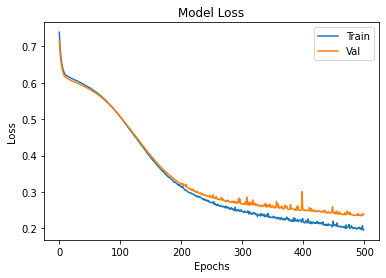

In [89]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

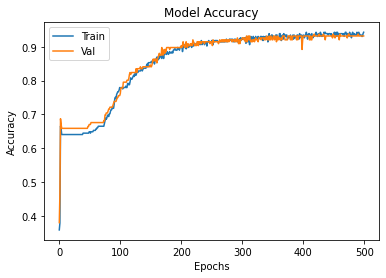

In [90]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (2) Retune Model (add dropout layers)

In [91]:
# Build Model and Architecture of Deep Neural Network

# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model = Sequential()
model.add(Dense(units = 20, activation='relu', input_dim=11))
model.add(Dropout(0.5))
model.add(Dense(units = 14, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [92]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'sgd',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [93]:
hist = model.fit(
    x_train_s, y_train, epochs = 500,
    validation_data = (x_val_s, y_val)
)

Epoch 1/500
8/8 [==============================] - 2s 113ms/step - loss: 0.7001 - accuracy: 0.5231 - val_loss: 0.7092 - val_accuracy: 0.3693
Epoch 2/500
8/8 [==============================] - 0s 26ms/step - loss: 0.6827 - accuracy: 0.5130 - val_loss: 0.7018 - val_accuracy: 0.3636
Epoch 3/500
8/8 [==============================] - 0s 28ms/step - loss: 0.6908 - accuracy: 0.5685 - val_loss: 0.6960 - val_accuracy: 0.3807
Epoch 4/500
8/8 [==============================] - 0s 30ms/step - loss: 0.6951 - accuracy: 0.5918 - val_loss: 0.6898 - val_accuracy: 0.5739
Epoch 5/500
8/8 [==============================] - 0s 29ms/step - loss: 0.6700 - accuracy: 0.5863 - val_loss: 0.6862 - val_accuracy: 0.6648
Epoch 6/500
8/8 [==============================] - 0s 31ms/step - loss: 0.6770 - accuracy: 0.6209 - val_loss: 0.6836 - val_accuracy: 0.6591
Epoch 7/500
8/8 [==============================] - 0s 33ms/step - loss: 0.6639 - accuracy: 0.6469 - val_loss: 0.6812 - val_accuracy: 0.6591
Epoch 8/500
8/8 [==

8/8 [==============================] - 0s 39ms/step - loss: 0.6510 - accuracy: 0.6405 - val_loss: 0.6098 - val_accuracy: 0.6591
Epoch 118/500
8/8 [==============================] - 0s 43ms/step - loss: 0.6137 - accuracy: 0.6500 - val_loss: 0.6090 - val_accuracy: 0.6591
Epoch 119/500
8/8 [==============================] - 0s 22ms/step - loss: 0.6294 - accuracy: 0.6560 - val_loss: 0.6082 - val_accuracy: 0.6591
Epoch 120/500
8/8 [==============================] - 0s 17ms/step - loss: 0.6293 - accuracy: 0.6535 - val_loss: 0.6076 - val_accuracy: 0.6591
Epoch 121/500
8/8 [==============================] - 0s 34ms/step - loss: 0.6303 - accuracy: 0.6313 - val_loss: 0.6068 - val_accuracy: 0.6591
Epoch 122/500
8/8 [==============================] - 0s 55ms/step - loss: 0.6529 - accuracy: 0.6317 - val_loss: 0.6072 - val_accuracy: 0.6591
Epoch 123/500
8/8 [==============================] - 0s 60ms/step - loss: 0.6055 - accuracy: 0.6709 - val_loss: 0.6065 - val_accuracy: 0.6591
Epoch 124/500
8/8 [=

Epoch 175/500
8/8 [==============================] - 0s 33ms/step - loss: 0.6204 - accuracy: 0.6746 - val_loss: 0.5699 - val_accuracy: 0.6989
Epoch 176/500
8/8 [==============================] - 0s 31ms/step - loss: 0.5994 - accuracy: 0.6688 - val_loss: 0.5693 - val_accuracy: 0.6989
Epoch 177/500
8/8 [==============================] - 0s 19ms/step - loss: 0.6374 - accuracy: 0.6460 - val_loss: 0.5686 - val_accuracy: 0.7045
Epoch 178/500
8/8 [==============================] - 0s 23ms/step - loss: 0.5849 - accuracy: 0.6774 - val_loss: 0.5687 - val_accuracy: 0.7045
Epoch 179/500
8/8 [==============================] - 0s 35ms/step - loss: 0.6480 - accuracy: 0.6708 - val_loss: 0.5678 - val_accuracy: 0.7045
Epoch 180/500
8/8 [==============================] - 0s 32ms/step - loss: 0.5962 - accuracy: 0.6976 - val_loss: 0.5665 - val_accuracy: 0.7045
Epoch 181/500
8/8 [==============================] - 0s 29ms/step - loss: 0.5738 - accuracy: 0.7042 - val_loss: 0.5646 - val_accuracy: 0.7045
Epoch 

Epoch 233/500
8/8 [==============================] - 0s 30ms/step - loss: 0.5755 - accuracy: 0.7047 - val_loss: 0.5150 - val_accuracy: 0.7955
Epoch 234/500
8/8 [==============================] - 0s 29ms/step - loss: 0.5648 - accuracy: 0.7176 - val_loss: 0.5149 - val_accuracy: 0.7955
Epoch 235/500
8/8 [==============================] - 0s 30ms/step - loss: 0.5735 - accuracy: 0.7195 - val_loss: 0.5143 - val_accuracy: 0.7898
Epoch 236/500
8/8 [==============================] - 0s 26ms/step - loss: 0.5830 - accuracy: 0.6863 - val_loss: 0.5127 - val_accuracy: 0.7955
Epoch 237/500
8/8 [==============================] - 0s 27ms/step - loss: 0.5546 - accuracy: 0.7337 - val_loss: 0.5113 - val_accuracy: 0.7955
Epoch 238/500
8/8 [==============================] - 0s 38ms/step - loss: 0.6022 - accuracy: 0.6812 - val_loss: 0.5105 - val_accuracy: 0.7898
Epoch 239/500
8/8 [==============================] - 0s 42ms/step - loss: 0.5925 - accuracy: 0.6909 - val_loss: 0.5094 - val_accuracy: 0.7898
Epoch 

Epoch 291/500
8/8 [==============================] - 0s 34ms/step - loss: 0.5160 - accuracy: 0.7444 - val_loss: 0.4539 - val_accuracy: 0.8352
Epoch 292/500
8/8 [==============================] - 0s 42ms/step - loss: 0.5266 - accuracy: 0.7443 - val_loss: 0.4527 - val_accuracy: 0.8352
Epoch 293/500
8/8 [==============================] - 1s 78ms/step - loss: 0.5216 - accuracy: 0.7544 - val_loss: 0.4510 - val_accuracy: 0.8352
Epoch 294/500
8/8 [==============================] - 0s 30ms/step - loss: 0.5388 - accuracy: 0.7225 - val_loss: 0.4492 - val_accuracy: 0.8409
Epoch 295/500
8/8 [==============================] - 0s 36ms/step - loss: 0.5295 - accuracy: 0.7798 - val_loss: 0.4510 - val_accuracy: 0.8352
Epoch 296/500
8/8 [==============================] - 0s 27ms/step - loss: 0.5563 - accuracy: 0.7213 - val_loss: 0.4494 - val_accuracy: 0.8523
Epoch 297/500
8/8 [==============================] - 0s 28ms/step - loss: 0.5053 - accuracy: 0.7775 - val_loss: 0.4491 - val_accuracy: 0.8409
Epoch 

Epoch 349/500
8/8 [==============================] - 0s 30ms/step - loss: 0.4656 - accuracy: 0.7807 - val_loss: 0.3914 - val_accuracy: 0.8864
Epoch 350/500
8/8 [==============================] - 0s 28ms/step - loss: 0.4616 - accuracy: 0.8002 - val_loss: 0.3899 - val_accuracy: 0.8920
Epoch 351/500
8/8 [==============================] - 0s 28ms/step - loss: 0.4822 - accuracy: 0.7810 - val_loss: 0.3881 - val_accuracy: 0.8920
Epoch 352/500
8/8 [==============================] - 0s 34ms/step - loss: 0.4603 - accuracy: 0.8223 - val_loss: 0.3869 - val_accuracy: 0.8864
Epoch 353/500
8/8 [==============================] - 0s 25ms/step - loss: 0.4509 - accuracy: 0.7977 - val_loss: 0.3853 - val_accuracy: 0.8864
Epoch 354/500
8/8 [==============================] - 0s 28ms/step - loss: 0.4979 - accuracy: 0.7857 - val_loss: 0.3830 - val_accuracy: 0.8750
Epoch 355/500
8/8 [==============================] - 0s 30ms/step - loss: 0.4388 - accuracy: 0.7952 - val_loss: 0.3822 - val_accuracy: 0.8750
Epoch 

Epoch 407/500
8/8 [==============================] - 0s 29ms/step - loss: 0.4191 - accuracy: 0.8128 - val_loss: 0.3389 - val_accuracy: 0.9091
Epoch 408/500
8/8 [==============================] - 0s 30ms/step - loss: 0.4766 - accuracy: 0.7946 - val_loss: 0.3389 - val_accuracy: 0.9091
Epoch 409/500
8/8 [==============================] - 0s 28ms/step - loss: 0.4512 - accuracy: 0.8006 - val_loss: 0.3385 - val_accuracy: 0.9091
Epoch 410/500
8/8 [==============================] - 0s 29ms/step - loss: 0.4142 - accuracy: 0.8468 - val_loss: 0.3364 - val_accuracy: 0.9091
Epoch 411/500
8/8 [==============================] - 0s 30ms/step - loss: 0.4441 - accuracy: 0.8056 - val_loss: 0.3357 - val_accuracy: 0.9034
Epoch 412/500
8/8 [==============================] - 0s 29ms/step - loss: 0.4411 - accuracy: 0.8035 - val_loss: 0.3373 - val_accuracy: 0.9034
Epoch 413/500
8/8 [==============================] - 0s 29ms/step - loss: 0.4270 - accuracy: 0.8023 - val_loss: 0.3357 - val_accuracy: 0.9091
Epoch 

Epoch 465/500
8/8 [==============================] - 0s 29ms/step - loss: 0.4249 - accuracy: 0.8417 - val_loss: 0.3049 - val_accuracy: 0.9091
Epoch 466/500
8/8 [==============================] - 0s 28ms/step - loss: 0.4246 - accuracy: 0.8257 - val_loss: 0.3062 - val_accuracy: 0.9091
Epoch 467/500
8/8 [==============================] - 0s 24ms/step - loss: 0.4060 - accuracy: 0.8273 - val_loss: 0.3067 - val_accuracy: 0.9091
Epoch 468/500
8/8 [==============================] - 0s 28ms/step - loss: 0.4571 - accuracy: 0.8091 - val_loss: 0.3032 - val_accuracy: 0.9034
Epoch 469/500
8/8 [==============================] - 0s 28ms/step - loss: 0.4274 - accuracy: 0.8062 - val_loss: 0.3017 - val_accuracy: 0.9034
Epoch 470/500
8/8 [==============================] - 0s 25ms/step - loss: 0.4006 - accuracy: 0.8214 - val_loss: 0.3010 - val_accuracy: 0.9091
Epoch 471/500
8/8 [==============================] - 0s 21ms/step - loss: 0.4391 - accuracy: 0.8335 - val_loss: 0.3017 - val_accuracy: 0.9034
Epoch 

# Check Model's Loss and Accuracy against Validation Data

In [94]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

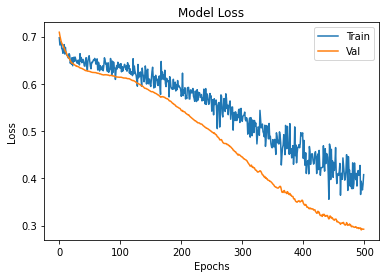

In [95]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

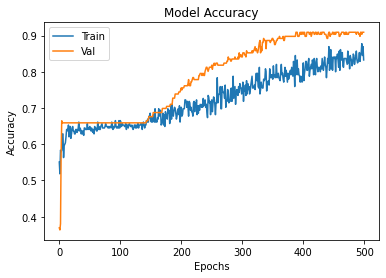

In [96]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (3) Retune Model (Use adam optimizer instead of sgd)

In [97]:
# Build Model and Architecture of Deep Neural Network

# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model = Sequential()
model.add(Dense(units = 20, activation='relu', input_dim=11))
model.add(Dense(units = 14, activation='relu'))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [98]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [99]:
hist = model.fit(
    x_train_s, y_train, epochs = 500,
    validation_data = (x_val_s, y_val)
)

Epoch 1/500
8/8 [==============================] - 2s 77ms/step - loss: 0.6802 - accuracy: 0.6489 - val_loss: 0.6545 - val_accuracy: 0.7670
Epoch 2/500
8/8 [==============================] - 0s 27ms/step - loss: 0.6423 - accuracy: 0.7847 - val_loss: 0.6322 - val_accuracy: 0.7273
Epoch 3/500
8/8 [==============================] - 0s 28ms/step - loss: 0.6299 - accuracy: 0.6971 - val_loss: 0.6158 - val_accuracy: 0.7045
Epoch 4/500
8/8 [==============================] - 0s 27ms/step - loss: 0.6226 - accuracy: 0.6825 - val_loss: 0.6036 - val_accuracy: 0.7045
Epoch 5/500
8/8 [==============================] - 0s 29ms/step - loss: 0.5990 - accuracy: 0.7060 - val_loss: 0.5885 - val_accuracy: 0.7330
Epoch 6/500
8/8 [==============================] - 0s 30ms/step - loss: 0.5752 - accuracy: 0.7601 - val_loss: 0.5739 - val_accuracy: 0.7557
Epoch 7/500
8/8 [==============================] - 0s 21ms/step - loss: 0.5749 - accuracy: 0.7425 - val_loss: 0.5589 - val_accuracy: 0.7557
Epoch 8/500
8/8 [===

8/8 [==============================] - 0s 34ms/step - loss: 0.1647 - accuracy: 0.9450 - val_loss: 0.1782 - val_accuracy: 0.9489
Epoch 118/500
8/8 [==============================] - 0s 29ms/step - loss: 0.1559 - accuracy: 0.9475 - val_loss: 0.1767 - val_accuracy: 0.9432
Epoch 119/500
8/8 [==============================] - 0s 28ms/step - loss: 0.1567 - accuracy: 0.9491 - val_loss: 0.1784 - val_accuracy: 0.9432
Epoch 120/500
8/8 [==============================] - 0s 35ms/step - loss: 0.1516 - accuracy: 0.9529 - val_loss: 0.1759 - val_accuracy: 0.9432
Epoch 121/500
8/8 [==============================] - 0s 31ms/step - loss: 0.1439 - accuracy: 0.9531 - val_loss: 0.1739 - val_accuracy: 0.9432
Epoch 122/500
8/8 [==============================] - 0s 29ms/step - loss: 0.1908 - accuracy: 0.9346 - val_loss: 0.1748 - val_accuracy: 0.9432
Epoch 123/500
8/8 [==============================] - 0s 39ms/step - loss: 0.1444 - accuracy: 0.9423 - val_loss: 0.1735 - val_accuracy: 0.9432
Epoch 124/500
8/8 [=

Epoch 175/500
8/8 [==============================] - 0s 28ms/step - loss: 0.1736 - accuracy: 0.9388 - val_loss: 0.1594 - val_accuracy: 0.9489
Epoch 176/500
8/8 [==============================] - 0s 28ms/step - loss: 0.1596 - accuracy: 0.9541 - val_loss: 0.1625 - val_accuracy: 0.9489
Epoch 177/500
8/8 [==============================] - 0s 27ms/step - loss: 0.1315 - accuracy: 0.9618 - val_loss: 0.1622 - val_accuracy: 0.9545
Epoch 178/500
8/8 [==============================] - 0s 36ms/step - loss: 0.1388 - accuracy: 0.9646 - val_loss: 0.1662 - val_accuracy: 0.9545
Epoch 179/500
8/8 [==============================] - 0s 29ms/step - loss: 0.1402 - accuracy: 0.9632 - val_loss: 0.1643 - val_accuracy: 0.9489
Epoch 180/500
8/8 [==============================] - 0s 29ms/step - loss: 0.1341 - accuracy: 0.9553 - val_loss: 0.1630 - val_accuracy: 0.9545
Epoch 181/500
8/8 [==============================] - 0s 29ms/step - loss: 0.1147 - accuracy: 0.9723 - val_loss: 0.1606 - val_accuracy: 0.9489
Epoch 

Epoch 233/500
8/8 [==============================] - 0s 26ms/step - loss: 0.1011 - accuracy: 0.9646 - val_loss: 0.1553 - val_accuracy: 0.9659
Epoch 234/500
8/8 [==============================] - 0s 35ms/step - loss: 0.1120 - accuracy: 0.9582 - val_loss: 0.1531 - val_accuracy: 0.9659
Epoch 235/500
8/8 [==============================] - 0s 31ms/step - loss: 0.1275 - accuracy: 0.9655 - val_loss: 0.1524 - val_accuracy: 0.9659
Epoch 236/500
8/8 [==============================] - 0s 27ms/step - loss: 0.1406 - accuracy: 0.9502 - val_loss: 0.1539 - val_accuracy: 0.9489
Epoch 237/500
8/8 [==============================] - 0s 30ms/step - loss: 0.1108 - accuracy: 0.9637 - val_loss: 0.1612 - val_accuracy: 0.9659
Epoch 238/500
8/8 [==============================] - 0s 28ms/step - loss: 0.1013 - accuracy: 0.9674 - val_loss: 0.1564 - val_accuracy: 0.9489
Epoch 239/500
8/8 [==============================] - 0s 28ms/step - loss: 0.0913 - accuracy: 0.9789 - val_loss: 0.1553 - val_accuracy: 0.9659
Epoch 

Epoch 291/500
8/8 [==============================] - 0s 31ms/step - loss: 0.1091 - accuracy: 0.9643 - val_loss: 0.1498 - val_accuracy: 0.9602
Epoch 292/500
8/8 [==============================] - 0s 29ms/step - loss: 0.1292 - accuracy: 0.9608 - val_loss: 0.1504 - val_accuracy: 0.9602
Epoch 293/500
8/8 [==============================] - 0s 29ms/step - loss: 0.0943 - accuracy: 0.9780 - val_loss: 0.1497 - val_accuracy: 0.9602
Epoch 294/500
8/8 [==============================] - 0s 28ms/step - loss: 0.1027 - accuracy: 0.9684 - val_loss: 0.1492 - val_accuracy: 0.9602
Epoch 295/500
8/8 [==============================] - 0s 29ms/step - loss: 0.0864 - accuracy: 0.9798 - val_loss: 0.1499 - val_accuracy: 0.9602
Epoch 296/500
8/8 [==============================] - 0s 30ms/step - loss: 0.0657 - accuracy: 0.9846 - val_loss: 0.1521 - val_accuracy: 0.9659
Epoch 297/500
8/8 [==============================] - 0s 29ms/step - loss: 0.1476 - accuracy: 0.9551 - val_loss: 0.1489 - val_accuracy: 0.9602
Epoch 

Epoch 349/500
8/8 [==============================] - 0s 29ms/step - loss: 0.0734 - accuracy: 0.9846 - val_loss: 0.1562 - val_accuracy: 0.9716
Epoch 350/500
8/8 [==============================] - 0s 30ms/step - loss: 0.1148 - accuracy: 0.9717 - val_loss: 0.1508 - val_accuracy: 0.9659
Epoch 351/500
8/8 [==============================] - 0s 29ms/step - loss: 0.0708 - accuracy: 0.9763 - val_loss: 0.1499 - val_accuracy: 0.9602
Epoch 352/500
8/8 [==============================] - 0s 28ms/step - loss: 0.1229 - accuracy: 0.9691 - val_loss: 0.1608 - val_accuracy: 0.9716
Epoch 353/500
8/8 [==============================] - 0s 62ms/step - loss: 0.0975 - accuracy: 0.9756 - val_loss: 0.1525 - val_accuracy: 0.9659
Epoch 354/500
8/8 [==============================] - 0s 29ms/step - loss: 0.0710 - accuracy: 0.9814 - val_loss: 0.1518 - val_accuracy: 0.9659
Epoch 355/500
8/8 [==============================] - 0s 23ms/step - loss: 0.1035 - accuracy: 0.9743 - val_loss: 0.1555 - val_accuracy: 0.9716
Epoch 

Epoch 407/500
8/8 [==============================] - 0s 27ms/step - loss: 0.0926 - accuracy: 0.9773 - val_loss: 0.1530 - val_accuracy: 0.9716
Epoch 408/500
8/8 [==============================] - 0s 24ms/step - loss: 0.0632 - accuracy: 0.9890 - val_loss: 0.1464 - val_accuracy: 0.9602
Epoch 409/500
8/8 [==============================] - 0s 34ms/step - loss: 0.0743 - accuracy: 0.9705 - val_loss: 0.1511 - val_accuracy: 0.9659
Epoch 410/500
8/8 [==============================] - 0s 30ms/step - loss: 0.0664 - accuracy: 0.9846 - val_loss: 0.1649 - val_accuracy: 0.9716
Epoch 411/500
8/8 [==============================] - 0s 36ms/step - loss: 0.0808 - accuracy: 0.9820 - val_loss: 0.1539 - val_accuracy: 0.9716
Epoch 412/500
8/8 [==============================] - 0s 31ms/step - loss: 0.0673 - accuracy: 0.9846 - val_loss: 0.1554 - val_accuracy: 0.9716
Epoch 413/500
8/8 [==============================] - 0s 33ms/step - loss: 0.0845 - accuracy: 0.9733 - val_loss: 0.1519 - val_accuracy: 0.9716
Epoch 

Epoch 465/500
8/8 [==============================] - 0s 52ms/step - loss: 0.0677 - accuracy: 0.9866 - val_loss: 0.1587 - val_accuracy: 0.9716
Epoch 466/500
8/8 [==============================] - 0s 47ms/step - loss: 0.0634 - accuracy: 0.9811 - val_loss: 0.1602 - val_accuracy: 0.9716
Epoch 467/500
8/8 [==============================] - 0s 30ms/step - loss: 0.0578 - accuracy: 0.9887 - val_loss: 0.1591 - val_accuracy: 0.9716
Epoch 468/500
8/8 [==============================] - 0s 36ms/step - loss: 0.0559 - accuracy: 0.9852 - val_loss: 0.1573 - val_accuracy: 0.9716
Epoch 469/500
8/8 [==============================] - 0s 45ms/step - loss: 0.0574 - accuracy: 0.9836 - val_loss: 0.1626 - val_accuracy: 0.9716
Epoch 470/500
8/8 [==============================] - 0s 52ms/step - loss: 0.0412 - accuracy: 0.9921 - val_loss: 0.1650 - val_accuracy: 0.9716
Epoch 471/500
8/8 [==============================] - 0s 30ms/step - loss: 0.0775 - accuracy: 0.9781 - val_loss: 0.1611 - val_accuracy: 0.9716
Epoch 

# Check Model's Loss and Accuracy against Validation Data

In [100]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

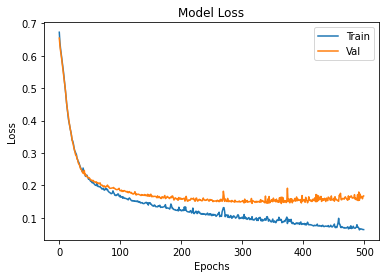

In [101]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

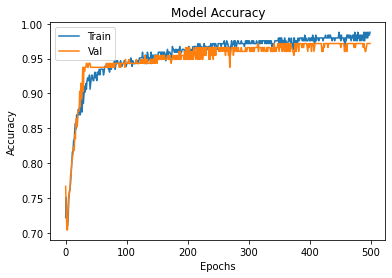

In [102]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# (4) Final Model

In [103]:
# Build Model and Architecture of Deep Neural Network

# Add layers of Neural Network = 4 , input_dim = number oof features
# units = 10,8,6 is number of neurons
model = Sequential()
model.add(Dense(units = 20, activation='relu', input_dim=11))
model.add(Dense(units = 14, activation='relu'))
model.add(Dense(units = 10, activation='relu'))
model.add(Dense(units = 1, activation='sigmoid'))

In [104]:
# Loss Dunction measures how well the model did on training and then tries
# to improve on it using optimizer
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [105]:
hist = model.fit(
    x_train_s, y_train, epochs = 300,
    validation_data = (x_val_s, y_val)
)

Epoch 1/300
8/8 [==============================] - 2s 77ms/step - loss: 0.7691 - accuracy: 0.3372 - val_loss: 0.7357 - val_accuracy: 0.3409
Epoch 2/300
8/8 [==============================] - 0s 30ms/step - loss: 0.7243 - accuracy: 0.3482 - val_loss: 0.7048 - val_accuracy: 0.3352
Epoch 3/300
8/8 [==============================] - 0s 27ms/step - loss: 0.6958 - accuracy: 0.3512 - val_loss: 0.6914 - val_accuracy: 0.3352
Epoch 4/300
8/8 [==============================] - 0s 28ms/step - loss: 0.6890 - accuracy: 0.3448 - val_loss: 0.6868 - val_accuracy: 0.3352
Epoch 5/300
8/8 [==============================] - 0s 25ms/step - loss: 0.6826 - accuracy: 0.4423 - val_loss: 0.6809 - val_accuracy: 0.7216
Epoch 6/300
8/8 [==============================] - 0s 28ms/step - loss: 0.6783 - accuracy: 0.7375 - val_loss: 0.6750 - val_accuracy: 0.8125
Epoch 7/300
8/8 [==============================] - 0s 28ms/step - loss: 0.6742 - accuracy: 0.7998 - val_loss: 0.6697 - val_accuracy: 0.8295
Epoch 8/300
8/8 [===

8/8 [==============================] - 0s 59ms/step - loss: 0.2877 - accuracy: 0.9689 - val_loss: 0.3072 - val_accuracy: 0.9489
Epoch 118/300
8/8 [==============================] - 0s 59ms/step - loss: 0.2989 - accuracy: 0.9610 - val_loss: 0.3081 - val_accuracy: 0.9489
Epoch 119/300
8/8 [==============================] - 0s 38ms/step - loss: 0.2768 - accuracy: 0.9696 - val_loss: 0.3050 - val_accuracy: 0.9489
Epoch 120/300
8/8 [==============================] - 0s 44ms/step - loss: 0.2918 - accuracy: 0.9602 - val_loss: 0.3013 - val_accuracy: 0.9432
Epoch 121/300
8/8 [==============================] - 0s 42ms/step - loss: 0.2779 - accuracy: 0.9697 - val_loss: 0.3026 - val_accuracy: 0.9489
Epoch 122/300
8/8 [==============================] - 0s 45ms/step - loss: 0.2811 - accuracy: 0.9534 - val_loss: 0.3026 - val_accuracy: 0.9489
Epoch 123/300
8/8 [==============================] - 0s 40ms/step - loss: 0.2818 - accuracy: 0.9603 - val_loss: 0.3116 - val_accuracy: 0.9432
Epoch 124/300
8/8 [=

Epoch 175/300
8/8 [==============================] - 0s 28ms/step - loss: 0.2177 - accuracy: 0.9663 - val_loss: 0.2495 - val_accuracy: 0.9545
Epoch 176/300
8/8 [==============================] - 0s 29ms/step - loss: 0.2063 - accuracy: 0.9825 - val_loss: 0.2503 - val_accuracy: 0.9545
Epoch 177/300
8/8 [==============================] - 0s 28ms/step - loss: 0.2133 - accuracy: 0.9732 - val_loss: 0.2529 - val_accuracy: 0.9545
Epoch 178/300
8/8 [==============================] - 0s 28ms/step - loss: 0.2108 - accuracy: 0.9731 - val_loss: 0.2470 - val_accuracy: 0.9545
Epoch 179/300
8/8 [==============================] - 0s 28ms/step - loss: 0.2046 - accuracy: 0.9780 - val_loss: 0.2470 - val_accuracy: 0.9545
Epoch 180/300
8/8 [==============================] - 0s 28ms/step - loss: 0.2146 - accuracy: 0.9767 - val_loss: 0.2475 - val_accuracy: 0.9545
Epoch 181/300
8/8 [==============================] - 0s 30ms/step - loss: 0.2259 - accuracy: 0.9623 - val_loss: 0.2489 - val_accuracy: 0.9545
Epoch 

Epoch 233/300
8/8 [==============================] - 0s 50ms/step - loss: 0.1729 - accuracy: 0.9737 - val_loss: 0.2111 - val_accuracy: 0.9489
Epoch 234/300
8/8 [==============================] - 0s 36ms/step - loss: 0.1668 - accuracy: 0.9758 - val_loss: 0.2133 - val_accuracy: 0.9545
Epoch 235/300
8/8 [==============================] - 0s 28ms/step - loss: 0.1674 - accuracy: 0.9746 - val_loss: 0.2141 - val_accuracy: 0.9545
Epoch 236/300
8/8 [==============================] - 0s 29ms/step - loss: 0.1567 - accuracy: 0.9830 - val_loss: 0.2117 - val_accuracy: 0.9545
Epoch 237/300
8/8 [==============================] - 0s 30ms/step - loss: 0.1723 - accuracy: 0.9749 - val_loss: 0.2081 - val_accuracy: 0.9489
Epoch 238/300
8/8 [==============================] - 0s 26ms/step - loss: 0.1546 - accuracy: 0.9764 - val_loss: 0.2099 - val_accuracy: 0.9489
Epoch 239/300
8/8 [==============================] - 0s 28ms/step - loss: 0.1709 - accuracy: 0.9786 - val_loss: 0.2156 - val_accuracy: 0.9545
Epoch 

Epoch 291/300
8/8 [==============================] - 0s 29ms/step - loss: 0.1497 - accuracy: 0.9787 - val_loss: 0.1856 - val_accuracy: 0.9545
Epoch 292/300
8/8 [==============================] - 0s 28ms/step - loss: 0.1444 - accuracy: 0.9766 - val_loss: 0.1983 - val_accuracy: 0.9545
Epoch 293/300
8/8 [==============================] - 0s 29ms/step - loss: 0.1504 - accuracy: 0.9871 - val_loss: 0.1886 - val_accuracy: 0.9489
Epoch 294/300
8/8 [==============================] - 0s 28ms/step - loss: 0.1512 - accuracy: 0.9717 - val_loss: 0.1994 - val_accuracy: 0.9545
Epoch 295/300
8/8 [==============================] - 0s 29ms/step - loss: 0.1492 - accuracy: 0.9778 - val_loss: 0.1868 - val_accuracy: 0.9489
Epoch 296/300
8/8 [==============================] - 0s 29ms/step - loss: 0.1424 - accuracy: 0.9777 - val_loss: 0.1880 - val_accuracy: 0.9545
Epoch 297/300
8/8 [==============================] - 0s 25ms/step - loss: 0.1405 - accuracy: 0.9801 - val_loss: 0.1891 - val_accuracy: 0.9545
Epoch 

# Check Model's Loss and Accuracy against Validation Data

In [106]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

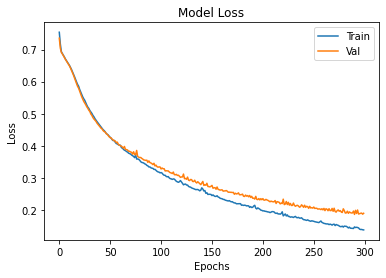

In [107]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

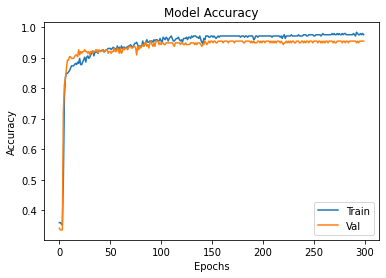

In [108]:
# Visuialize the Training and Valudation Loss to see if Model is overfitting
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'])

# Model Evaluation on test set

In [109]:
model.evaluate(x_test_s, y_test)

6/6 [==============================] - 0s 9ms/step - loss: 0.1462 - accuracy: 0.9714


[0.14624376595020294, 0.9714285731315613]

In [ ]:
# Model Accuracy is 97.14 % 

# Predict Outcomes

In [110]:
predictions = model.predict(x_test)
prediction2 = np.where(predictions>= 0.87, 1,0)

In [111]:
print(len(prediction2))
print(len(x_test))

175
175
